# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: https://www.kaggle.com/datasets/rajatsurana979/fast-food-sales-report

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [118]:
#import needed libraires with aliases
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


#read the CSV and put it in a dataframe. I have the CSV file in the local directory. 
data = pd.read_csv("Balaji Fast Food Sales.csv")
df = pd.DataFrame(data)
df


,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
...,...,...,...,...,...,...,...,...,...,...
995,996,3/19/2023,Frankie,Fastfood,50,10,500,NaN,Mrs.,Evening
996,997,9/20/2022,Sandwich,Fastfood,60,7,420,NaN,Mr.,Evening
997,998,1/26/2023,Sandwich,Fastfood,60,13,780,NaN,Mr.,Evening
998,999,8/27/2022,Panipuri,Fastfood,20,5,100,NaN,Mrs.,Afternoon


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [101]:
# Time to ground myself with some general data overview. 
# First I'll look at the shape just to see how big the dataset is. 
# I'll print the first 5 rows to get an idea of how the data looks and print the info to see data types and column names. 
#there are 10 columns and 1000 rows. Most rows are all non-null. There are 4 integar data types: order_id, item_price, quantity, and transcation amount. 
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [102]:
#I want to know how many distinct values there are for certain columns. For example, what are the different food types and how many times were they each ordered. 
food_options_count = df.groupby('item_name')['item_name'].count()
display(food_options_count)

#what time of day is the most popular time to order?
time_of_order_group = df.groupby('time_of_sale')['time_of_sale'].count()
display(time_of_order_group)

#what item type is most popular
item_count = df.groupby('item_type')['item_type'].count()
display(item_count)



item_name
Aalopuri           134
Cold coffee        161
Frankie            139
Panipuri           150
Sandwich           129
Sugarcane juice    153
Vadapav            134
Name: item_name, dtype: int64

time_of_sale
Afternoon    205
Evening      201
Midnight     199
Morning      190
Night        205
Name: time_of_sale, dtype: int64

item_type
Beverages    314
Fastfood     686
Name: item_type, dtype: int64

In [103]:

#I want to look closer at the 4 columns with numeric data. This is the bread and butter. I want to know the average transaction amount, the average item price, and the average quanity 
# per transaction.
df.describe()

,order_id,item_price,quantity,transaction_amount
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,33.315000,8.162000,275.230000
std,288.819436,14.921744,4.413075,204.402979
min,1.000000,20.000000,1.000000,20.000000
25%,250.750000,20.000000,4.000000,120.000000
50%,500.500000,25.000000,8.000000,240.000000
75%,750.250000,50.000000,12.000000,360.000000
max,1000.000000,60.000000,15.000000,900.000000


In [104]:
# Now that I have a general idea of some sales data, I want to break it down further. 
# Group by metrics of interest to see how they affect sales. 
aggregate_dictionary = {
    "transaction_amount": ["sum", "mean"] 
}

#how does the time of sale affect the total sales. What does it tell about ordering behavior?
time_of_order_group = df.groupby('time_of_sale').agg(aggregate_dictionary)
time_of_order_group

transaction_amount            
                            sum        mean
time_of_sale                               
Afternoon                 56345  274.853659
Evening                   52355  260.472637
Midnight                  50725  254.899497
Morning                   53730  282.789474
Night                     62075  302.804878

In [116]:

#I can use the aggregate dictionary I made above to look at other groups. Here I want to see how fastfood and beverages compare in sames. 
#They average out very similarly but there are more food orders.
time_of_order_group = df.groupby('item_type').agg(aggregate_dictionary)
time_of_order_group

transaction_amount            
                         sum        mean
item_type                               
Beverages              86390  275.127389
Fastfood              188840  275.276968

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

Text(0, 0.5, 'Total Sales')

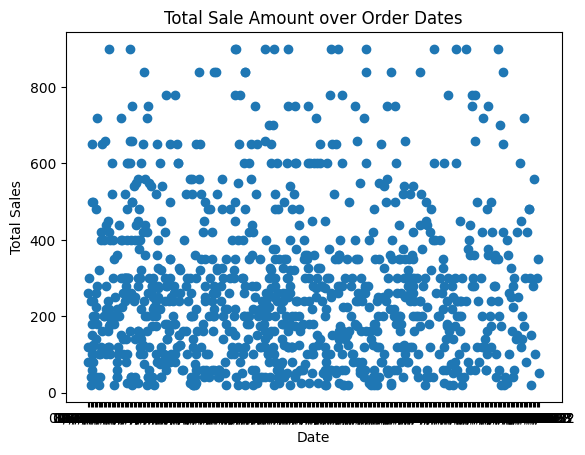

In [114]:
#I want to plot data and sales in a scatter plot to see if there is a trend in sales over time.
plt.scatter(x=df['date'], y=df['transaction_amount'])
plt.title("Total Sale Amount over Order Dates")
plt.xlabel("Date")
plt.ylabel("Total Sales")

# it looks very random with sales being distributed equally over time.

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Aalopuri'),
  Text(1, 0, 'Vadapav'),
  Text(2, 0, 'Sugarcane juice'),
  Text(3, 0, 'Panipuri'),
  Text(4, 0, 'Frankie'),
  Text(5, 0, 'Sandwich'),
  Text(6, 0, 'Cold coffee')])

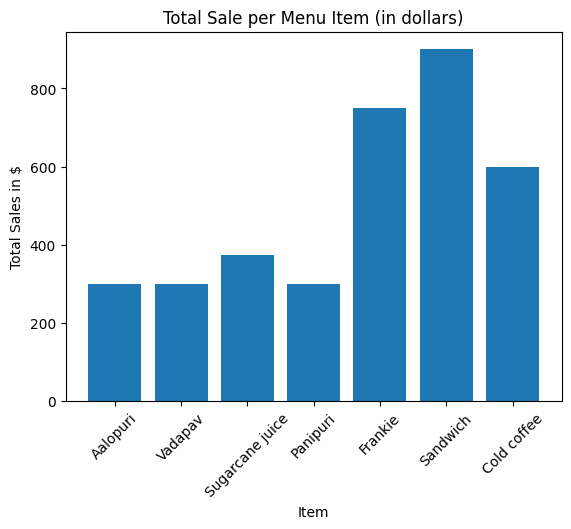

In [106]:
#Above you can see the sandwich is ordered the least number of times, But it's sales accounts for the most revenue. 
#what item generates the most money? A bar graph shows this simply.
plt.bar(x=df['item_name'], height=df['transaction_amount'])
plt.title("Total Sale per Menu Item (in dollars)")
plt.xlabel("Item")
plt.ylabel("Total Sales in $")
plt.xticks(rotation=45)

<Axes: xlabel='item_name'>

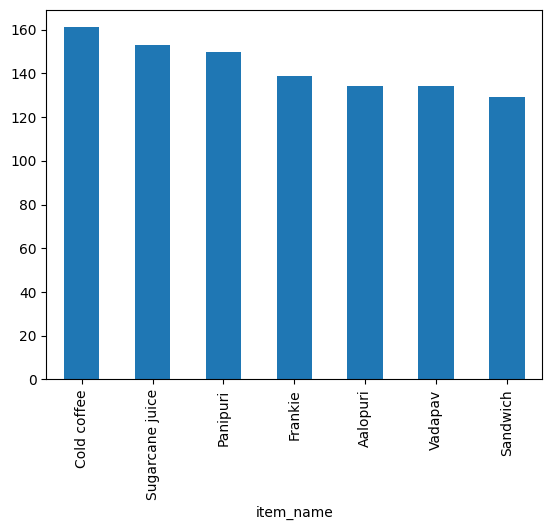

In [115]:
#here I chart out the counts per item like I did in the groupby above. Each item is ordered roughly the same amount. But the cost is very different. 
df['item_name'].value_counts().plot(kind='bar')


<Axes: xlabel='item_type'>

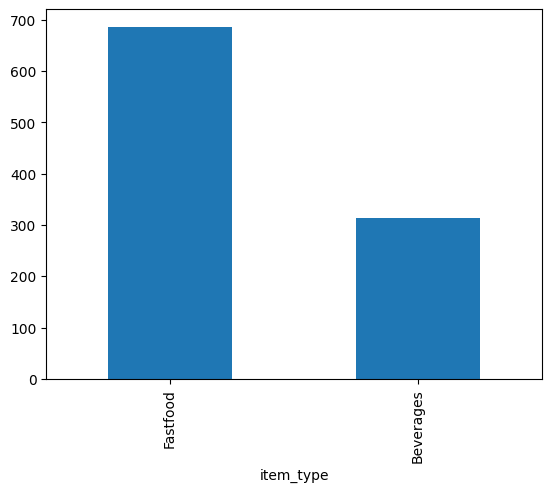

In [117]:
#The above chart shows each Item ordered approximately in the same quantity. I want to see how food and beverages stack up. Bar charts accomplish this simply. 
df['item_type'].value_counts().plot(kind='bar')


## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? I am surprised by how uniform the data set it. It was easy to work with and had a high usability. 

2. Do you have any concerns about your dataset? My biggest concern is that this data is fake. Is it okay to use? Is synthetic data have any use other than educational?

3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? The data is already very leacn. I'd like to dig deeper into the Time of Order and The date of order to see how weekends and weekdays affect the time of order. I want to know when and what generate the most profit to better direct marketing efforts. 